# 1.1 Modellierung der Wärmenachfrage eines Fernwärmenetzes mittel linearer Regression


In [119]:
%matplotlib inline
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from scipy import stats, optimize
from IPython.display import display, Latex
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,  mean_squared_error
import seaborn as sns
from IPython.display import Markdown as md
from scipy import stats
import statsmodels.api as sm
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,  mean_squared_error

In [120]:
demand_path = Path("__file__").parent.resolve()
demand_path = demand_path / "ENTSOE_countries" / "Demand"
demand_filename = "AT_2019.csv"
waermenachfrage_filename = "Waermenachfrage_Uebung1.xlsx"
file = demand_path / demand_filename

df_demand = pd.read_csv(file)
df_waermenachfrage = pd.read_excel(waermenachfrage_filename, engine = 'openpyxl')

In [121]:
nachfrage = df_waermenachfrage.loc[:, "Nachfrage"].to_numpy()
temperatur = df_waermenachfrage.loc[:, "Temp"].to_numpy()

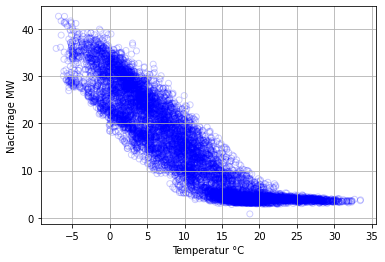

In [122]:
plt.scatter(temperatur, nachfrage, alpha=0.2, facecolors='none', edgecolors='b')
plt.xlabel("Temperatur °C")
plt.ylabel("Nachfrage MW")
plt.grid()

Einfache Regression:
$$y_t = b_0 + b_1 * T_0$$

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

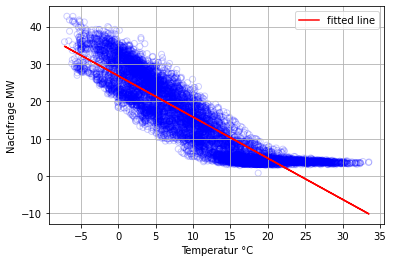

In [123]:
regression = stats.linregress(temperatur, nachfrage)
display(Latex(f"R-squared: {regression.rvalue**2:.6f}"))
display(Latex(f"P-value: {regression.pvalue:.6f}"))
display(Latex(f"$b_{0}$: {regression.intercept:.6f}"))
display(Latex(f"$b_{1}$: {regression.slope:.6f}"))
display(Latex(f"$sqrt(Var(b_{1}))$: {regression.stderr:.6f}"))
display(Latex(f"$sqrt(Var(b_{0}))$: {regression.intercept_stderr:.6f}"))
plt.scatter(temperatur, nachfrage, alpha=0.2, facecolors='none', edgecolors='b')
plt.xlabel("Temperatur °C")
plt.ylabel("Nachfrage MW")
plt.plot(temperatur, regression.intercept + regression.slope*temperatur, 'r', label='fitted line')
plt.legend()
plt.grid()

c) <br>
Liegt der P-Wert unter 0.05, so ist der Koeffizient einer Variable im Modell signifikant.<br>
Da der P-Wert bei uns = 0 ist, bedeuted das, dass die Temperatur einen signifikanten Einfluss auf die Nachfrage hat. <br>

Der t-Wert ergibt sich aus 
\begin{equation}
t(b_i)=\frac{b_i - \beta}{Var(b_i)}
\end{equation}
$\beta$ ist der Schätzer der Nullhypothese $H_0$ und entspricht dem Wert 0. Somit berechnet sich der $t-Wert$ von $b_1$ zu $-193.2$ und von $b_2$ zu $348.2$.Da der t-Wert weit entfernt vom Schätzer der Nullhyphotese ist, kann diese verworfen werden.

<br>
$R^2$ ist der Determinationskoeffizient. Er gibt an wie sehr die Varianz der abhängigen Variable durch die erklärende Variable erklärt wird. Werte für $R^2$ liegen immer zwischen 0 und 1. Umso näher der Wert bei 1 liegt, umso besser nähert sich das Model den real gemessenen Werten an. In unserem Fall, mit $R^2 = 81\% $ bedeuted es, dass die Variable "Temperatur" 81% der Nachfragewerte erklärt. <br>

<br>
Nullhypothese:<br>
Die Nullhypothese kann nicht verifiziert sondern nur falsifizert werden. Wenn der P-Wert sehr "klein" ist, kann man die Nullhypothese ablehnen. <br>
In unserem Fall ist die Nullhypothese: "Die Nachfrage ist nicht abhängig von der Temperatur."
<br>
Insgesamt gibt es $8785$ Messwerte. Da die Freiheitsgrade einer Statistik, immer die Anzahl der Messpunkte minus den zu bestimmenden Parametern entspricht, so haben wir in diesem Modell $8783$ Freiheitsgrade.

# Modell 2

Regression mit Polynom 3.ten Grades:
$$y_t = b_0 + b_1 * T_1 + b_2 * h_t + b_3 * h_t^2 +b_4 * h_t^3 $$

<AxesSubplot:xlabel='Stunde', ylabel='Nachfrage'>

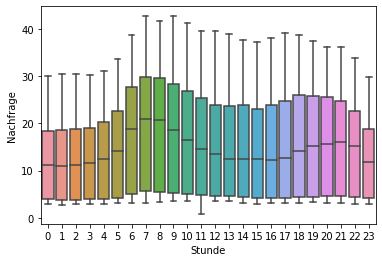

In [124]:
h_t = df_waermenachfrage.loc[:, "Stunde"]
nachfrage = df_waermenachfrage.loc[:, "Nachfrage"]
data_1 = pd.concat([h_t, nachfrage],axis=1)

sns.boxplot(x = "Stunde", y="Nachfrage", data= data_1)
#plt.xlabel("Zeit")
#plt.ylabel("Nachfrage MW")
#plt.grid()

In [125]:
def function_1(data, b0, b1, b2, b3, b4):
    return b0 + b1*data[0]+ b2*data[1] + b3*data[1]**2 + b4*data[1]**3

In [126]:
data = ([temperatur, h_t])
opt, cov = optimize.curve_fit(function_1, data, nachfrage)

In [127]:
display(Latex(f"$b_{0}$:{opt[0]:.6f}"))
display(Latex(f"$b_{1}$:{opt[1]:.6f}"))
display(Latex(f"$b_{2}$:{opt[2]:.6f}"))
display(Latex(f"$b_{3}$:{opt[3]:.6f}"))
display(Latex(f"$b_{4}$:{opt[4]:.6f}"))
perr = np.sqrt(np.diag(cov))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Die Standardabweichungen der einzelnen Parameter entsprechen:

In [128]:
display(Latex(f"$\sqrt var(b_{0})$:{perr[0]:.6f}"))
display(Latex(f"$\sqrt var(b_{1})$:{perr[1]:.6f}"))
display(Latex(f"$\sqrt var(b_{2})$:{perr[2]:.6f}"))
display(Latex(f"$\sqrt var(b_{3})$:{perr[3]:.6f}"))
display(Latex(f"$\sqrt var(b_{4})$:{perr[4]:.6f}"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Daraus ergeben sich wiederum die t-Werte unter Annahme der Nullhypothese $H_0$: 

In [129]:
t_werte = opt/perr
display(Latex(f"$t(b_{0})$:{t_werte[0]:.6f}"))
display(Latex(f"$t(b_{1})$:{t_werte[1]:.6f}"))
display(Latex(f"$t(b_{2})$:{t_werte[2]:.6f}"))
display(Latex(f"$t(b_{3})$:{t_werte[3]:.6f}"))
display(Latex(f"$t(b_{4})$:{t_werte[4]:.6f}"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Das Bestimmtheitsmaß ist ein Gütemaß der linearen Regression und dient eigentlich nicht als Gütemaß bei eines nichtlinearen Fit. Nichtsdestotrotz enspricht der R^2 Wert hier: 

In [130]:
linie = function_1(data, opt[0], opt[1], opt[2], opt[3], opt[4])
R_2 = sum((linie-np.mean(nachfrage))**2)/sum((nachfrage - np.mean(nachfrage))**2)
display(Latex(f"$R^{2}$={R_2:.6f}"))

<IPython.core.display.Latex object>

Somit beschreibt dieses Modell unsere Nachfrage besser als das lineare Modell. 

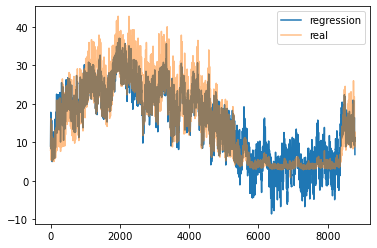

In [131]:
plt.plot(linie, label="regression")
plt.plot(nachfrage, alpha=0.5, label="real")
plt.legend()

# Modell 3
Die Nachfrage wird nun anhand des stündlichen Nachfrage-Verlaufs modelliert. Dabei wird für jede Stunde eine lineare Regression durchgeführt anhand: 
\begin{equation}
y_t^j = b_0^j + b_1^j* T_0^j
\end{equation}
wobei der index j für die jeweilige Stunde im Tagesverlauf steht: $j \subseteq [0,23]$

In [132]:
parameters_stunden = []
nachfrage_stunden = []

for i in range(24):
    df_waermenachfrage_stunde = df_waermenachfrage[df_waermenachfrage['Stunde']==i].copy()
    nachfrage_stunden.append(df_waermenachfrage_stunde)
    temperatur = df_waermenachfrage_stunde['Temp']
    nachfrage = df_waermenachfrage_stunde['Nachfrage']
    regression = stats.linregress(temperatur, nachfrage)
    parameters_stunden.append(regression)
    #print("Für Stunde %i beträgt b_0= %.6f und b_1= %.6f. Das Bestimmtheitsmaß beträgt %.6f" % (i, regression.intercept, regression.slope, regression.rvalue**2))


Die größten Unterschiede der Parameter $b_i^j$ können ausgemacht werde zwischen Stunde 0 und Stunde 7: 

| **Koeffizient** | **Wert** | **Standardabweichung** | **t-Statistik**
| --- | --- | --- | --- |
| $\beta_0^7$ | 32.514 | .283 | 114.89
| $\beta_1^7$ | -1.659 | .027| -61.444
| $R^2$ | 0.912 |  |  

| **Koeffizient** | **Wert** | **Standardabweichung** | **t-Statistik**
| --- | --- | --- | --- |
| $\beta_0^0$ | 21.499 | .283 | 75.968
| $\beta_1^0$ | -0.994 | .027 | -36.815
| $R^2$ | 0.927 |  | 

Die unterschiede der beiden Kurven lassen sich dadurch erklären, dass im Jahresmittel die Nachfrage um 7 Uhr stärkeren Schwankungen ausgesetzt ist, als die Nachfrage um Mitternacht. Die Bestimmtheitsmaße zu den jeweiligen Stunden treffen besser zu als zu den vorherigen Modellen. Besonders zu den Nachtstunden, wo der Wärmebedarf im Jahresmittel geringere Schwankungen beinhaltet, scheint die lineare Regression besser zuzutreffen, als über das ganze Jahr.  

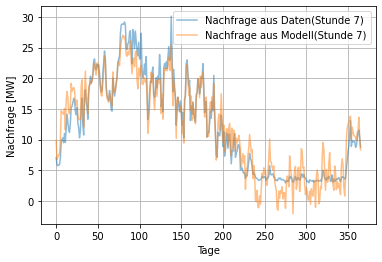

In [133]:
nachfrage_stunden[0]['Tage_rel'] = np.arange(0,nachfrage_stunden[0].shape[0]) 
nachfrage_stunden[0]['Nachfrage_modell'] = 21.499 + (-0.994 * nachfrage_stunden[0]['Temp'])
x = nachfrage_stunden[0]['Tage_rel'].to_numpy()
y_1 = nachfrage_stunden[0]['Nachfrage'].to_numpy()
y_2 = nachfrage_stunden[0]['Nachfrage_modell'].to_numpy()
plt.plot(x , y_1, alpha=0.5, label = 'Nachfrage aus Daten(Stunde 7)')
plt.plot(x , y_2, alpha=0.5, label = 'Nachfrage aus Modell(Stunde 7)')
plt.xlabel("Tage")
plt.ylabel("Nachfrage [MW]")
plt.legend()
plt.grid()

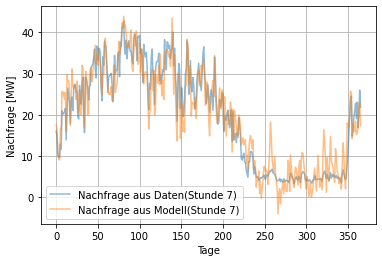

In [134]:
nachfrage_stunden[7]['Tage_rel'] = np.arange(0,nachfrage_stunden[7].shape[0]) 
nachfrage_stunden[7]['Nachfrage_modell'] = 32.514 + (-1.659 * nachfrage_stunden[7]['Temp'])
x = nachfrage_stunden[7]['Tage_rel'].to_numpy()
y_1 = nachfrage_stunden[7]['Nachfrage'].to_numpy()
y_2 = nachfrage_stunden[7]['Nachfrage_modell'].to_numpy()
plt.plot(x , y_1, alpha=0.5, label = 'Nachfrage aus Daten(Stunde 7)')
plt.plot(x , y_2, alpha=0.5, label = 'Nachfrage aus Modell(Stunde 7)')
plt.xlabel("Tage")
plt.ylabel("Nachfrage [MW]")
plt.legend()
plt.grid()


## Interpretation
Die beiden vorherigen Abbildungen zeigen, dass die Modelle sowohl zur Stunde 7 als auch zur Stunde 0 in den Wintermonaten sehr gut zutreffen. In den Sommermonaten kommt es jedoch trotz relativ stabiler Nachfage zu einer hohen Schwankungsbreite des Modells gegenüber der echten Daten. Der Grund hierfür liegt in der Abhängigkeit des Modells an der Temperatur. Da die Temperatur einen nur sehr geringen Einfluss auf die Nachfrage in den Sommermonaten hat, kommt es hier zu einer starken Abweichung vom "echten" Verlauf. 

d) 

In [135]:
nachfrage = df_waermenachfrage.loc[:, "Nachfrage"].to_numpy()
temperatur = df_waermenachfrage.loc[:, "Temp"].to_numpy()
Sommerwoche = nachfrage[7_000:7_168]
Winterwoche = nachfrage[0:168]
def function_2(data, b0, b1, b2, b3, b4, x1, x2):
    return b0 + b1*data[0][x1:x2]+ b2*data[1][x1:x2] + b3*data[1][x1:x2]**2 + b4*data[1][x1:x2]**3
winter_model2 = function_2(data, opt[0], opt[1], opt[2], opt[3], opt[4], 0, 168)
sommer_model2 = function_2(data, opt[0], opt[1], opt[2], opt[3], opt[4], 7000, 7168)

Text(0, 0.5, 'Nachfrage')

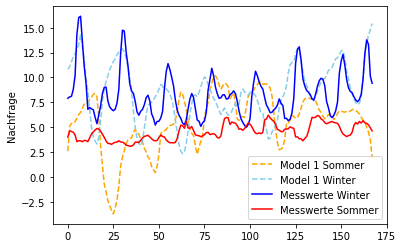

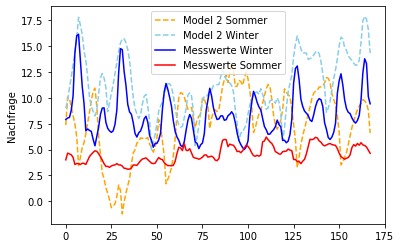

In [136]:
x_achse = np.arange(168)
plt.plot(x_achse, regression.intercept + regression.slope*temperatur[7_000:7_168], "--", label='Model 1 Sommer', color="orange")
plt.plot(x_achse, regression.intercept + regression.slope*temperatur[0:168], "--", label='Model 1 Winter', color="skyblue")
plt.plot(x_achse, nachfrage[0:168], label="Messwerte Winter", color="blue")
plt.plot(x_achse,nachfrage[7_000:7_168], label="Messwerte Sommer", color="red")
plt.legend()
plt.ylabel("Nachfrage")
fig = plt.figure()
plt.plot(x_achse, sommer_model2, "--", color="orange", label="Model 2 Sommer")
plt.plot(x_achse, winter_model2, "--", color="skyblue", label="Model 2 Winter")
plt.plot(x_achse, nachfrage[0:168], "b", label="Messwerte Winter")
plt.plot(x_achse, nachfrage[7_000:7_168], "r", label="Messwerte Sommer")
plt.legend()
plt.ylabel("Nachfrage")

In beiden Modellen wird die Winterwoche besser abgebildet. Daraus lässt sich ableiten,
dass die Nachfrage im Winter stärker temperaturabhängig ist, da beide Modelle die Temperatur als Variable enthalten.
Im Sommer fluktuieren die Werte aus Model 1 und 2 viel stärker als die gemessenen Werte. Das liegt daran, dass für 
das "Training" dieser Modelle auch die Wintermonate einfließen. Dadurch kommt es auch im Sommer im Model zu starken
Fluktuationen obwohl hier die Änderungen in der Nachfrage nicht mehr wirklich über die Temperatur erklärt werden können. 


e)

Text(0.5, 0, 'Temperatur')

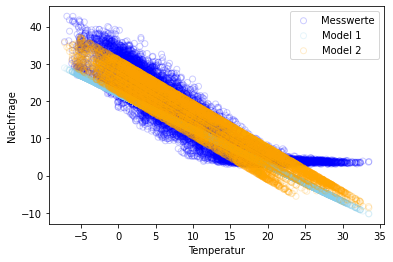

In [137]:
nachfrage_model2 = function_1(data, opt[0], opt[1], opt[2], opt[3], opt[4])
x_achse = np.arange(168)
plt.scatter(temperatur, nachfrage, label="Messwerte", alpha=0.2,facecolors='none', edgecolors='b')
plt.scatter(temperatur, regression.intercept + regression.slope*temperatur, label='Model 1', alpha=0.2,facecolors='none', edgecolors='skyblue')
plt.scatter(temperatur, nachfrage_model2, label="Model 2", alpha=0.2,facecolors='none', edgecolors='orange')

plt.legend()
plt.ylabel("Nachfrage")
plt.xlabel("Temperatur")


Im ersten Model führt der lineare Verlauf besonders im Sommer bei Temperaturen über 20°C zu sehr hohen Abweichungen. Im zweiten Model sind diese Abweichungen nicht mehr so groß und auch im Winter wird die Nachfrage eher abgedeckt als mit Model 1. Allerdings sind beide Modelle besonders für den Sommer verbesserungbedürftig.

## Modell 4

Bei Betrachtung des Verlaufes der Nachfrage nach der Temperatur erkennt man einen stark negativ linearen Zusammenhang unterhalb der Temperatur von 18°C. Der Vorschlag für ein verbessertes Modell liegt somit auf der Hand als ein Modell, welches aus zwei linearen Funktionen zusammengesetzt wird. Diese gelten je nach Jahreszeit für unterschiedliche Bereiche. Dabei werden die Daten geteilt in einen Datensatz der alle Daten vom 1. Oktober 2007 bis 25. April 2008 und von 15. Oktober 2008 bis 10.Oktober 2008 zusammenfasst und ein Datensatz der die Daten von 26. April 2008 bis 14. Oktober 2008 zusammenfasst.

Je nach Zeit gilt entweder $y_t^W$ für den Winter und $y_t^S$ für den Sommer. 
$$t \subseteq [Winter] \rightarrow y_t^W = b_0 + b_1 * T$$ 
$$t \subseteq [Sommer] \rightarrow y_t^S = b_2 + b_3 * T$$
Der Teil des Modells, welcher die Nachfrage in den Wintermonaten definiert, wird modelliert anhand der Nachfrage nach der Temperatur, solange die Temperatur kleiner als 20°C ist. 

In [138]:
temp = 20
df_winter = df_waermenachfrage[df_waermenachfrage['Temp'] <= temp]
df_sommer = df_waermenachfrage[df_waermenachfrage['Temp'] > temp]
lin_regression_winter = stats.linregress(df_winter['Temp'].to_numpy(), df_winter['Nachfrage'].to_numpy())
lin_regression_sommer = stats.linregress(df_sommer['Temp'].to_numpy(), df_sommer['Nachfrage'].to_numpy())
#display(Latex(f"$b_{0}$: {lin_regression_winter.intercept:.6f}"))
#display(Latex(f"$b_{1}$: {lin_regression_winter.slope:.6f}"))
#display(Latex(f"$R^2$: {lin_regression_winter.rvalue**2:.6f}"))
#display(Latex(f"$R^2$: {lin_regression_winter.rvalue**2:.6f}"))
#display(Latex(f"$b_{2}$: {lin_regression_sommer.intercept:.6f}"))
#display(Latex(f"$b_{3}$: {lin_regression_sommer.slope:.6f}"))
#display(Latex(f"$R^2$: {lin_regression_sommer.rvalue**2:.6f}"))

Damit ergeben sich die Werte zu:

| **Koeffizient** | **Wert** | $R^2$ |
| --- | --- | --- | 
| $\beta_0$ | 28.312 | 0.834 |
| $\beta_1$ | -1.360 | |
| $\beta_2$ | 5.599 | 0.116| 
| $\beta_3$ | -0.068 |  |

Für die kalte Jahreszeit gilt: $$y_t^W=  28.542 - 1.416 \cdot T$$ bei einem Bestimmtheitsmaß von 0.834.
<br>
Für die warme Jahreszeit gilt: $$y_t^S= 5.628 - 0.069 \cdot T$$ bei einem Bestimmtheitsmaß von 0.116.

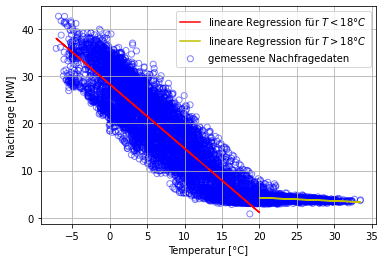

In [139]:
plt.scatter(df_waermenachfrage['Temp'], df_waermenachfrage['Nachfrage'], alpha=0.5, facecolors='none', edgecolors='b', label= "gemessene Nachfragedaten")
plt.xlabel("Temperatur [°C]")
plt.ylabel("Nachfrage [MW]")
plt.plot(df_winter['Temp'], lin_regression_winter.intercept + lin_regression_winter.slope * df_winter['Temp'], 'r', label='lineare Regression für $T<18°C$')
plt.plot(df_sommer['Temp'], lin_regression_sommer.intercept + lin_regression_sommer.slope * df_sommer['Temp'], 'y', label='lineare Regression für $T>18°C$')
plt.legend()
plt.grid()

Das Bestimmtheitsmaß der linearen Kurve für die Temperaturen über 20°C nimmt einen Wert an der nahe bei ein liegt. Der Grund hierfür kann in der bereits erhöhten Schwankungsbreite in den Nachfragewerten bei 20°C liegen.<br>
Der Verlauf der Nachfrage über alle Tage eines Jahres wird somit modelliert zu: 

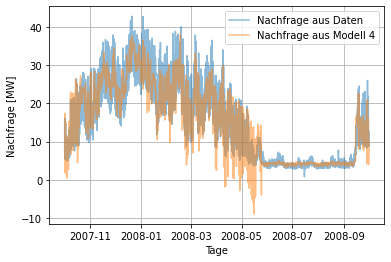

In [140]:
df_waermenachfrage['Tage_rel'] = np.arange(0,df_waermenachfrage.shape[0]) 
filter1 = df_waermenachfrage['Zeit'] < pd.Timestamp('2008-5-25')
filter2 = df_waermenachfrage['Zeit'] > pd.Timestamp('2008-09-15')
df_waermenachfrage['Nachfrage_modell'] = 0
df_waermenachfrage['Nachfrage_modell'].where(filter1 | filter2,lin_regression_sommer.intercept + lin_regression_sommer.slope * df_waermenachfrage['Temp'],
                                             inplace = True)
df_waermenachfrage['Nachfrage_modell'].where((filter1 | filter2)== False,lin_regression_winter.intercept + lin_regression_winter.slope * df_waermenachfrage['Temp'],
                                            inplace = True)
x = df_waermenachfrage['Zeit'].to_numpy()
y_1 = df_waermenachfrage['Nachfrage'].to_numpy()
y_2 = df_waermenachfrage['Nachfrage_modell'].to_numpy()
plt.plot(x , y_1, alpha=0.5, label = 'Nachfrage aus Daten')
plt.plot(x , y_2, alpha=0.5, label = 'Nachfrage aus Modell 4')
plt.xlabel("Tage")
plt.ylabel("Nachfrage [MW]")
plt.legend()
plt.grid()

#### Interpretation
Wie man anhand der Abbildung erkennen kann, bildet das Modell 4 die Daten besser ab als Modell 2. Besonders in den Sommermonaten ist eine Verbesserung zu erkennen. Aufgrund der so gut wie fehlenden Temperaturabhängigkeit kann dieser Wert besser mit einer Konstante und einer sehr schwachen Temperaturabhängigkeit vorhergesagt werden. 

# 1.2 Modellierung des Strompreises von Österreich mittels linearer Regression


In dieser Aufgabe wird ein Regressionsmodell zur Abschätzung des stündlichen Strompreises in Österreich erstellt. Der Preis ist jeweils abhängig von der Netzlast (NL) und der Einspeisung erneuerbarer Energie (EE). Als erneuerbare Energieträger werden im Modell Wind, PV und Wasserkraft einbezogen. Die jeweiligen Nachfrage-und Erzeugungsdaten für Österreich im Jahr 2019 stammen von der ENTSO-E und wurden bereitgestellt. Es wurde das Jahr 2019 gewählt, da es sich im Jahr 2020 um ein coronabedingtes "Ausnahmejahr" mit einem Rückgang der Netzlast handelte. 

In [141]:
notebook_path = Path("__file__").parent.resolve()
#print(notebook_path)

year = 2019
filename = f"AT_{year}.csv"
prices_path = notebook_path / "ENTSOE_countries" / "Prices"
#print(f"Prices path: {prices_path}")
file = prices_path / filename
#print(f"file: {file}")
df_prices = pd.read_csv(file)

demand_path = notebook_path / "ENTSOE_countries" / "Demand"
file = demand_path / filename
df_demand = pd.read_csv(file)

generation_path = notebook_path / "ENTSOE_countries" / "Generation"
file = generation_path / filename
df_generation = pd.read_csv(file)

In [142]:
df_demand_hourly = pd.DataFrame()
df_demand_hourly['Time'] = df_demand[df_demand.index % 4 == 0 ].Time.reset_index(drop=True)
N = 4
df_demand_hourly['Demand'] = df_demand.groupby(df_demand.index // N).sum()

df_demand_hourly

,Time,Demand
0,2019-01-01T00:00:00.0,24300.0
1,2019-01-01T01:00:00.0,23411.0
2,2019-01-01T02:00:00.0,22477.0
3,2019-01-01T03:00:00.0,21296.0
4,2019-01-01T04:00:00.0,21094.0
...,...,...
8755,2019-12-31T19:00:00.0,28603.0
8756,2019-12-31T20:00:00.0,26992.0
8757,2019-12-31T21:00:00.0,25717.0
8758,2019-12-31T22:00:00.0,25970.0


In [143]:
#df_generation_hourly = df_generation[df_generation.index % 4 == 0 ]
df_generation_cols = list(df_generation.columns)
df_generation_cols.pop(df_generation_cols.index('Time'))
df_generation_hourly = pd.DataFrame()
N = 4
df_generation_hourly = df_generation.loc[:,df_generation_cols].groupby(df_generation.index // N).sum()
df_generation_hourly['Time'] = df_generation[df_generation.index % 4 == 0 ].Time.reset_index(drop=True)
df_generation_hourly = df_generation_hourly[['Time'] + df_generation_cols]

df_generation_hourly

#df_generation

,Time,Solar,WindOnShore,WindOffShore,Hydro,HydroStorage,HydroPumpedStorage,Marine,Nuclear,Geothermal,...,Waste,OtherRenewable,Lignite,Coal,Gas,CoalGas,Oil,ShaleOil,Peat,Other
0,2019-01-01T00:00:00.0,0.0,980.0,0.0,10775.0,489.0,-6483.0,0.0,0.0,0.0,...,400.0,0.0,0.0,622.0,5079.0,0.0,0.0,0.0,0.0,88.0
1,2019-01-01T01:00:00.0,0.0,752.0,0.0,10863.0,639.0,-6411.0,0.0,0.0,0.0,...,400.0,0.0,0.0,619.0,3741.0,0.0,0.0,0.0,0.0,88.0
2,2019-01-01T02:00:00.0,0.0,556.0,0.0,10973.0,309.0,-5762.0,0.0,0.0,0.0,...,400.0,0.0,0.0,621.0,2444.0,0.0,0.0,0.0,0.0,88.0
3,2019-01-01T03:00:00.0,0.0,460.0,0.0,11018.0,272.0,-6621.0,0.0,0.0,0.0,...,400.0,0.0,0.0,621.0,2272.0,0.0,0.0,0.0,0.0,88.0
4,2019-01-01T04:00:00.0,0.0,652.0,0.0,10842.0,344.0,-6447.0,0.0,0.0,0.0,...,400.0,0.0,0.0,617.0,1774.0,0.0,0.0,0.0,0.0,88.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2019-12-31T19:00:00.0,0.0,7996.0,0.0,10008.0,1997.0,5895.0,0.0,0.0,0.0,...,400.0,0.0,0.0,650.0,7190.0,0.0,0.0,0.0,0.0,88.0
8756,2019-12-31T20:00:00.0,0.0,7200.0,0.0,9695.0,1361.0,2704.0,0.0,0.0,0.0,...,400.0,0.0,0.0,648.0,7221.0,0.0,0.0,0.0,0.0,88.0
8757,2019-12-31T21:00:00.0,0.0,7828.0,0.0,9593.0,739.0,1364.0,0.0,0.0,0.0,...,400.0,0.0,0.0,653.0,7112.0,0.0,0.0,0.0,0.0,88.0
8758,2019-12-31T22:00:00.0,0.0,8112.0,0.0,9362.0,465.0,732.0,0.0,0.0,0.0,...,400.0,0.0,0.0,615.0,6842.0,0.0,0.0,0.0,0.0,88.0


In [144]:
demand = df_demand_hourly.loc[:, "Demand"].to_numpy()
prices = df_prices.loc[:, "Price"].to_numpy()
df_generation_sum = df_generation_hourly["Solar"] + df_generation_hourly["WindOnShore"] + df_generation_hourly["Hydro"]
generation_solar = df_generation_hourly.loc[:, "Solar"].to_numpy()
generation_wind_on_shore = df_generation_hourly.loc[:, "WindOnShore"].to_numpy()
generation_hydro = df_generation_hourly.loc[:, "Hydro"].to_numpy()
generation_sum = generation_solar + generation_wind_on_shore + generation_hydro

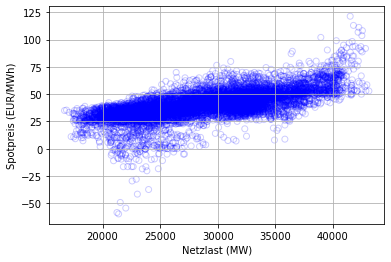

In [145]:
plt.scatter(demand, prices, alpha=0.2, facecolors='none', edgecolors='b')
plt.xlabel("Netzlast (MW)")
plt.ylabel("Spotpreis (EUR/MWh)")
plt.grid()

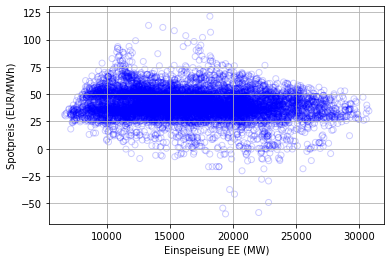

In [146]:
plt.scatter(generation_sum, prices, alpha=0.2, facecolors='none', edgecolors='b')
plt.xlabel("Einspeisung EE (MW)")
plt.ylabel("Spotpreis (EUR/MWh)")
plt.grid()

Aus den beiden Grafiken [6] und [7] kann bereits grob abgelesen werden, dass ein positiver Zusammenhang zwischen Netzlast und Spotpreis besteht und ein sehr leicht negativer Zusammenhang zwischen Einspeisung EE und Spotpreis. 

a) Das Regressionsmodell wurde folgendermaßen formuliert:
$$p_t = b_0 + b_1 * NL_t + b_2 * EE_t  $$
Mit:
$$p_t = Spotpreis\:  (EUR/MWh)\:  zum \: Zeitpunkt\:  t$$
$$NL_t = Netzlast \: zum \: Zeitpunkt\:  t$$
$$EE_t = Einspeisung\:  erneuerbarer\:  Energie\:  zum\:  Zeitpunkt\:  t$$

In [147]:
X = np.column_stack((demand, generation_sum))
y = prices

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     3871.
Date:                Sun, 25 Apr 2021   Prob (F-statistic):               0.00
Time:                        21:08:09   Log-Likelihood:                -32187.
No. Observations:                8760   AIC:                         6.438e+04
Df Residuals:                    8757   BIC:                         6.440e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7214      0.642      2.683      0.0

b) Es wurde die Methode der kleinsten Quadrate (OLS) zur Schätzung der Koeffizienten verwendet. 
Die Ergebnisse der Regression sind die folgenden:

geschätzte Koeffizienten:
$$b_0 = 1.7214$$
$$b_1 = 0.0016$$
$$b_2 = -0.0004$$

t-Statistiken: 2.683, 85.693, -20.305

adjustierte Bestimmtheitsmaß (R-squared): 0.469


Da die Beträge der t-Statistik größer als 1,96 sind, kann abgleitet werden, dass sich der jeweilige geschätzte Parameter mit 95% Wahrscheinlichkeit von 0 unterscheidet. 
Das adjustierte Bestimmtheitsmaß beträgt allerdings nur 0.469. Somit werden nur 46.9% der Varianz des Spotpreises in diesem Modell erfasst. 


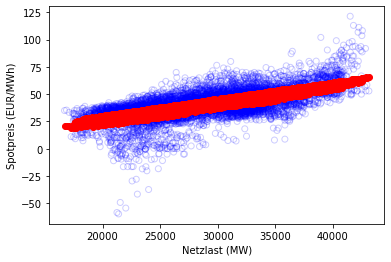

In [148]:

X = pd.DataFrame(pd.concat([df_demand_hourly["Demand"], df_generation_sum], axis=1))
Y = pd.DataFrame(df_prices['Price'])
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

plt.scatter(demand, prices, alpha=0.2, facecolors='none', edgecolors='b')
plt.plot(pd.DataFrame(df_demand_hourly["Demand"]), Y_pred, 'o', color='red')
plt.xlabel("Netzlast (MW)")
plt.ylabel("Spotpreis (EUR/MWh)")
plt.show()


c) Grafik [9] zeigt den Zusammenhang zwischen Netzlast und Strompreis im Modell (rot) und mit tatsächlichen Strompreisen (blau). 
Es kann eine positive Korrelation zwischen Spotpreis und Netzlast in der Grafik sowie auch in der Regressionsanalyse (Koeffizient 0.0016) gezeigt werden. Dies entspricht ebenfalls der Realität, da basierend auf der Merit-Order-Kurve bei einer höheren Netzlast Spitzenlastkraftwerke mit höheren Grenzkosten zugeschaltet werden und diese somit einen höheren Preis festsetzen. 

d) Der Zusammenhang zwischen Einspeisung EE und Strompreis wurde mit dem Koeffizienten -0.0004 bestimmt. Diese negative Korrelation entsteht dadurch, dass die Grenzkosten von erneuerbaren Energieträgern bei 0 sind und sich somit bei einer höheren Einspeisung von EE der Preis reduziert, da Kraftwerke mit höheren Grenzkosten dann nicht benötigt werden. 